# I. Import necessary libraries

In [215]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf

According to this paper "the target variable coding
for the Kaggle data should be reversed; or else, it must be interpreted as ‘0’ for ‘Heart
Disease’ and ‘1’ for ‘No Heart Disease’"

In [217]:
# reversing the values so that 1 == heart disease, 0 == no heart disease
df['target'] = df['target'].replace(1, 2) # use temp number to swap values
df['target'] = df['target'].replace(0, 1)
df['target'] = df['target'].replace(2, 0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


# II. Examine Data set



In [218]:
df.shape

(1025, 14)

In [219]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


In [220]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.486829
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [221]:
#check and if missing values need to clean dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [242]:
#break down column info
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 1 = normal; 2 = fixed defect; 3 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 1 = normal; 2 = fixed defect; 3 = reversable defect


In [223]:
#examine target column
df["target"].unique()

array([1, 0])

0 and 1 indicates classification where 1 = heart disease, 0 = healthy

Check correlations between column and target

In [224]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


fbs shows weakest correlation comparred to others

For ML the model we will choose features after performing data anlysis

# III. Exploratory Data Analysis



Analyze target column

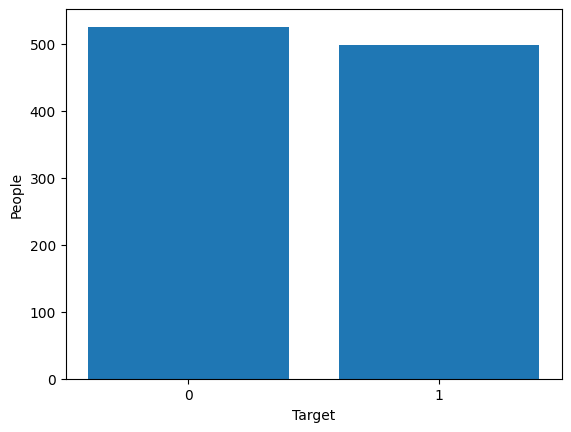

pecent of patients with heart issues:  48.68
pecent of patients without heart issues:  51.32


In [229]:
total = len(df)
disease = len(df[df['target'] ==1])
healthy = len(df[df['target']== 0])

plt.bar(['0','1'],[healthy, disease])
plt.xlabel('Target')
plt.ylabel('People')
plt.show()

disease = round((disease/total)*100, 2)
healthy = round((healthy/total)*100, 2)
print('pecent of patients with heart issues: ', disease)
print('pecent of patients without heart issues: ', healthy)

1. Sex

In [230]:
num_male = len(df[(df['sex']==1)])
num_female = len(df[(df['sex']==0)])
print(num_male, num_female)

713 312


In [231]:
# we see a much smaller amouont of female data which could be important

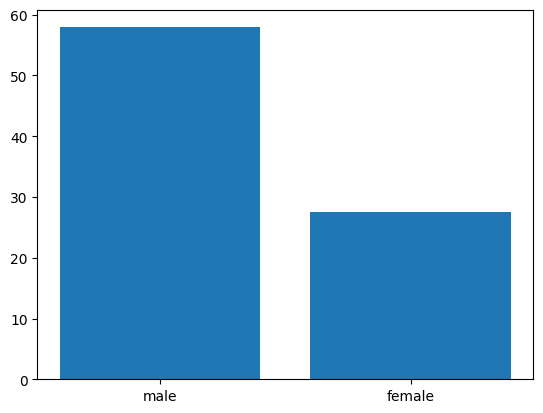

percent of males with heart disease: 57.92
percent of females with heart disease: 27.56


In [232]:
male_dis = len(df[(df['sex']==1) & (df['target']== 1)]) / len(df[df['sex'] == 1]) * 100
female_dis = len(df[(df['sex']==0) & (df['target']== 1)]) / len(df[df['sex']==0]) * 100

plt.bar(['male', 'female'], [male_dis, female_dis])
plt.show()
print('percent of males with heart disease:', round(male_dis,2))
print('percent of females with heart disease:', round(female_dis,2))

In [172]:
# we see that males are more likely to have heart disease according to the data
# note that data shows much higher proporrtion of males whith heart disease compaared to females
#however most other data suggests females tend to have a higher chance of getting heart disease
#moght creae two models, one for males and one for females

2. Chest Pain (4 values 0 to 3)

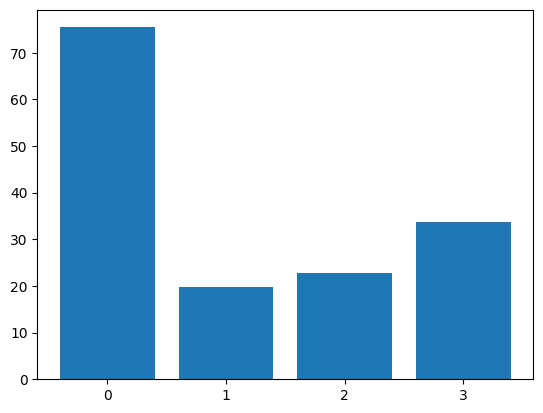

pecent of people who reported level 0 chest pain: 75.45
pecent of people who reported level 1 chest pain: 19.76
pecent of people who reported level 2 chest pain: 22.89
pecent of people who reported level 3 chest pain: 33.77


In [234]:
cp = [0,0,0,0]
for i in range(4):
  cp[i] = len(df[(df['cp'] == i) & (df['target'] == 1)]) / len(df[df['cp']==i]) * 100


plt.bar(['0', '1', '2', '3'], cp)
plt.show()

for i in range(len(cp)):
  print(f"pecent of people who reported level {i} chest pain: {round(cp[i],2)}")


In [174]:
# we see that those who report no chest pain had a much higher chance of having heart disease
# which is again interesting thing to note

3. Resting Electrocardiographic Results (values 0 to 2)

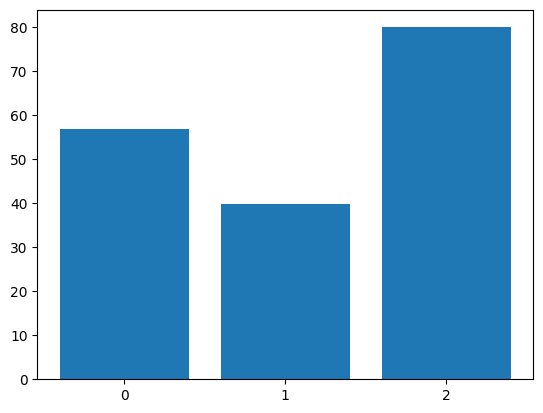

pecent of people who had a restecg level of 0: 56.94
pecent of people who had a restecg level of 1: 39.77
pecent of people who had a restecg level of 2: 80.0


In [236]:
rest_ecg = [0,0,0]

for i in range(3):
  rest_ecg[i] = len(df[(df['restecg']== i) & (df['target']) == 1]) / len(df[df['restecg'] == i]) * 100

plt.bar(['0', '1', '2'], rest_ecg)
plt.show()

for i in range(3):
  print(f"pecent of people who had a restecg level of {i}: {round(rest_ecg[i],2)}")



In [176]:
# we see that those with level 1 had a slighlty lower chance of haveing heart disease
# and those with level 2 had a slightly higher chance

4. Exercise Induced Angina

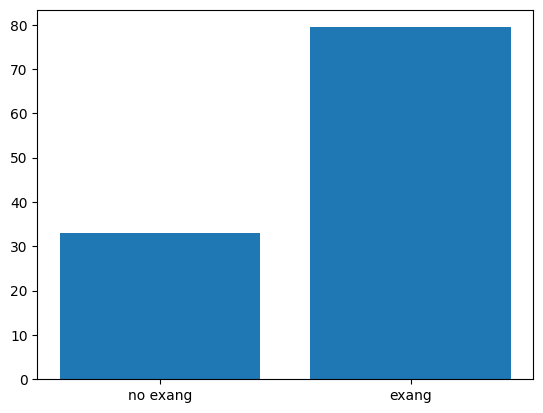

pecent of people who had an exang score of 0: 33.09
pecent of people who had an exang score of 1: 79.42


In [239]:
exang = [0,1]

for i in range(2):
  exang[i] = len(df[(df['exang']== i) & (df['target']) == 1]) / len(df[df['exang'] == i]) * 100

plt.bar(['no exang', 'exang'], exang)
plt.show()

for i in range(2):
  print(f"pecent of people who had an exang score of {i}: {round(exang[i],2)}")



In [ ]:
# we see that those who had an exercised induced angina have higher chances of haveing heart disease

5. thal

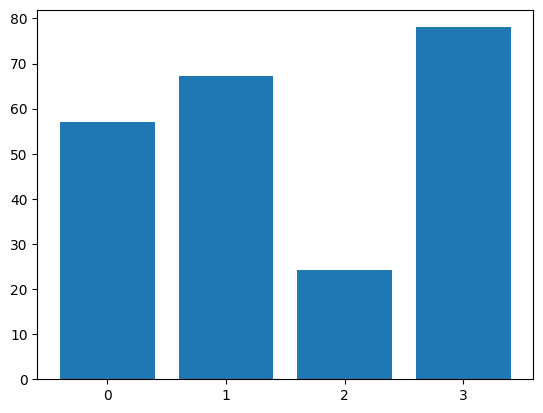

pecent of people who had an thal value of 0: 57.14
pecent of people who had an thal value of 1: 67.19
pecent of people who had an thal value of 2: 24.26
pecent of people who had an thal value of 3: 78.05


In [241]:
thal = [0,1,2,3]

for i in range(4):
  thal[i] = len(df[(df['thal']== i) & (df['target']) == 1]) / len(df[df['thal'] == i]) * 100

plt.bar(['0', '1', '2', '3'], thal)
plt.show()

for i in range(4):
  print(f"pecent of people who had an thal value of {i}: {round(thal[i],2)}")

In [ ]:
# 2 is fixed defect and they have much lower % could indicate after defect was fixed
# they thus lived in such a way to reduce chances of getting heart disease again

6. Oldpeak

In [243]:
df['oldpeak'].describe()

,oldpeak
count,1025.000000
mean,1.071512
std,1.175053
min,0.000000
25%,0.000000
50%,0.800000
75%,1.800000
max,6.200000


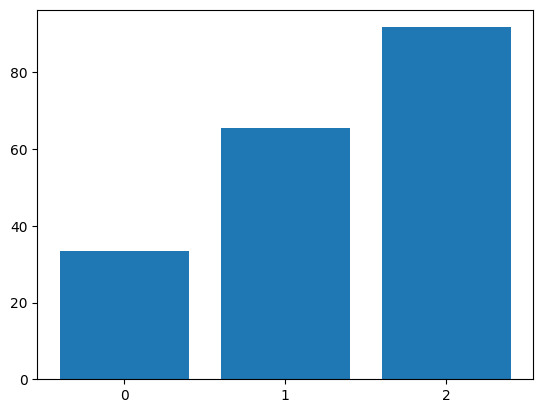

percent of people who had an oldpeak <=1: 33.5559265442404
percent of people who had an oldpeak >1 and <=3: 65.43909348441926
percent of people who had an oldpeak< >3: 91.78082191780823


In [247]:
#mean of
oldpeak = [0,1,2]
oldpeak[0] = len(df[(df['oldpeak']<= 1) & (df['target']) == 1]) / len(df[df['oldpeak'] <= 1]) * 100
oldpeak[1] = len(df[(df['oldpeak'] > 1) & (df['oldpeak'] <= 3) &
 (df['target']) == 1]) / len(df[(df['oldpeak'] > 1) & (df['oldpeak'] <= 3)]) * 100
oldpeak[2] = len(df[(df['oldpeak'] > 3) & (df['target']) == 1]) / len(df[df['oldpeak'] >3]) * 100

plt.bar(['0', '1', '2'], oldpeak)
plt.show()

print(f"percent of people who had an oldpeak <=1: {oldpeak[0]}")
print(f"percent of people who had an oldpeak >1 and <=3: {oldpeak[1]}")
print(f"percent of people who had an oldpeak< >3: {oldpeak[2]}")


In [ ]:
# kind of chose abitrarily but we see that as oldpeak increased, rates of heart disease did as well

# IV Train-Test Split